In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.colab import drive
# 1. Mount Google Drive
# This step will prompt you to authorize Google Colab to access your Google Drive.
print("Mounting Google Drive...")
drive.mount('/content/drive/')
print("Google Drive mounted successfully!")

Mounting Google Drive...
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Google Drive mounted successfully!


In [2]:
# 2. Define the path to your CSV files
csv_folder_path = '/content/drive/My Drive/LSTM_results'

In [3]:
# Check if the folder exists
if not os.path.exists(csv_folder_path):
    print(f"Error: Folder not found at '{csv_folder_path}'")
    print("Please make sure the folder name is correct and it exists in your Google Drive.")
else:
    print(f"Accessing folder: {csv_folder_path}")

    # 3. List all CSV files in the specified folder
    csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

    if not csv_files:
        print(f"No CSV files found in '{csv_folder_path}'. Please check the folder content.")
    else:
        print(f"Found {len(csv_files)} CSV files:")
        for f in csv_files:
            print(f"- {f}")

        # 4. Initialize an empty list to store DataFrames
        all_dfs = []

        # 5. Loop through each CSV file, read it into a DataFrame, and append to the list
        print("\nReading and appending CSV files...")
        for csv_file in csv_files:
            file_path = os.path.join(csv_folder_path, csv_file)
            try:
                df = pd.read_csv(file_path)
                all_dfs.append(df)
                print(f"Successfully read: {csv_file}")
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")

        # 6. Concatenate all DataFrames into a single DataFrame
        if all_dfs:
            try:
                combined_df = pd.concat(all_dfs, ignore_index=True)
                print("\nAll CSV files successfully combined into one DataFrame!")
                print("\nCombined DataFrame Info:")
                combined_df.info()
                print("\nFirst 5 rows of the combined DataFrame:")
                print(combined_df.head())
                print(f"\nTotal rows in combined DataFrame: {len(combined_df)}")
            except Exception as e:
                print(f"Error concatenating DataFrames: {e}")
        else:
            print("No DataFrames were successfully read to combine.")

# Optional: Save the combined DataFrame to a new CSV file in your Google Drive
# output_path = '/content/drive/My Drive/combined_data.csv'
# if 'combined_df' in locals(): # Check if combined_df was created
#     try:
#         combined_df.to_csv(output_path, index=False)
#         print(f"\nCombined DataFrame saved to: {output_path}")
#     except Exception as e:
#         print(f"Error saving combined DataFrame: {e}")

Accessing folder: /content/drive/My Drive/LSTM_results
Found 27 CSV files:
- 13304050_result_df_202506091614.csv
- 13304050_result_df_202506091619.csv
- 13304050_result_df_202506091621.csv
- 13342500_result_df_202506091628.csv
- 13342500_result_df_202506091630.csv
- 13342500_result_df_202506091633.csv
- 13342500_result_df_202506091637.csv
- 13311000_result_df_202506091913.csv
- 13311000_result_df_202506091949.csv
- 13311000_result_df_202506092022.csv
- 13310850_result_df_202506092032.csv
- 13340600_result_df_202506092055.csv
- 13340600_result_df_202506092102.csv
- 13340600_result_df_202506092106.csv
- 13340000_result_df_202506092112.csv
- 13340000_result_df_202506092122.csv
- 13340000_result_df_202506092128.csv
- 13340000_result_df_202506092134.csv
- 13317660_result_df_202506092138.csv
- 13317660_result_df_202506092142.csv
- 13154500_result_df_202506101531.csv
- 13154500_result_df_202506101539.csv
- 12322000_result_df_202506101545.csv
- 12322000_result_df_202506101549.csv
- 12322000_re

In [4]:
combined_df.sort_values(by=['current_time','model_site','KGE']).tail(4)

,current_time,model_site,train_month,h1,h2,d1,d2,batch,look_back,optimizer,learning_rate,r2,rmse,bias,std_ratio,correlation,KGE,KGE_r_comp,KGE_alpha_comp,KGE_beta_comp
23,2025-06-10 15:49:05.068246,12322000,"[3, 4, 5, 6, 7, 8]",200,100,0.1,0.05,16,45,<keras.src.optimizers.adam.Adam object at 0x7b...,0.0001,0.869820,1.455055,0.880415,0.961832,0.949849,[0.89989249],NaN,NaN,NaN
24,2025-06-10 15:58:16.856939,12322000,"[3, 4, 5, 6, 7, 8]",200,100,0.1,0.10,16,45,<keras.src.optimizers.adam.Adam object at 0x7c...,0.0001,0.871017,1.430887,0.822907,0.956234,0.948290,[0.90062981],NaN,NaN,NaN
25,2025-06-10 16:02:13.695611,12305000,"[3, 4, 5, 6, 7, 8]",200,100,0.1,0.10,16,45,<keras.src.optimizers.adam.Adam object at 0x7a...,0.0001,0.889873,1.589861,0.190516,1.100290,0.955437,[0.88869006],[0.95543683],[1.10028989],[1.01860009]
26,2025-06-10 16:50:27.504549,12305000,"[3, 4, 5, 6, 7, 8]",400,100,0.1,0.10,16,45,<keras.src.optimizers.adam.Adam object at 0x7f...,0.0001,0.876030,1.588846,0.222205,1.084641,0.947412,[0.89801853],[0.94741167],[1.08464078],[1.02169391]


In [5]:



result =  combined_df.groupby('model_site').agg({'rmse': 'min', 'bias':'min','r2': 'max','KGE': 'max'})

print(result)

result.to_csv('best_KGE_result.csv')

                rmse      bias        r2           KGE
model_site                                            
12305000    1.588846  0.190516  0.889873  [0.89801853]
12322000    1.430887  0.822907  0.871017  [0.90062981]
13154500    0.546917 -0.024704  0.964977  [0.98113166]
13304050    1.041534 -1.338033  0.692966  [0.92043523]
13310850    0.887377 -0.467724  0.939661  [0.89575072]
13311000    0.544358 -0.374235  0.950157  [0.94731925]
13317660    1.850689 -0.117304  0.938194  [0.96460254]
13340000    1.635042  0.090853  0.946337  [0.96440917]
13340600    1.095614  0.365782  0.973471  [0.96477695]
13342500    0.968252 -0.176003  0.922750   [0.9578747]


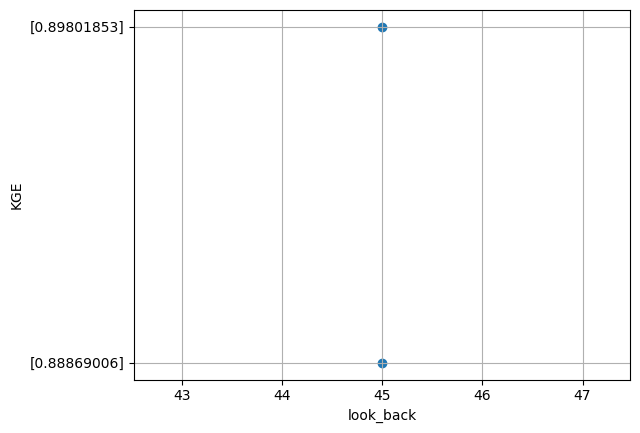

In [6]:
x='look_back'
y='KGE'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y])
plt.xlabel( x)
plt.ylabel( y )
plt.title( '')
plt.grid(True)
plt.show()


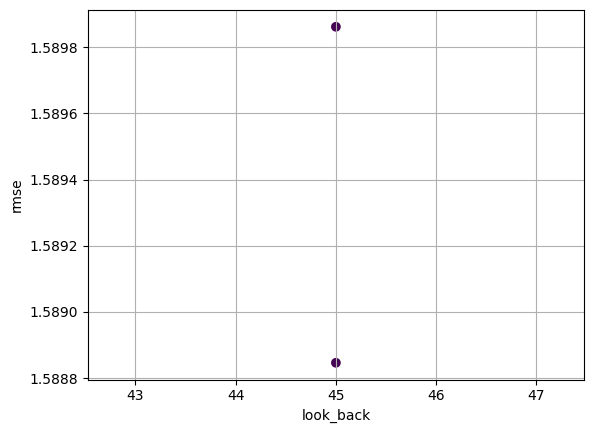

In [7]:
x='look_back'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()

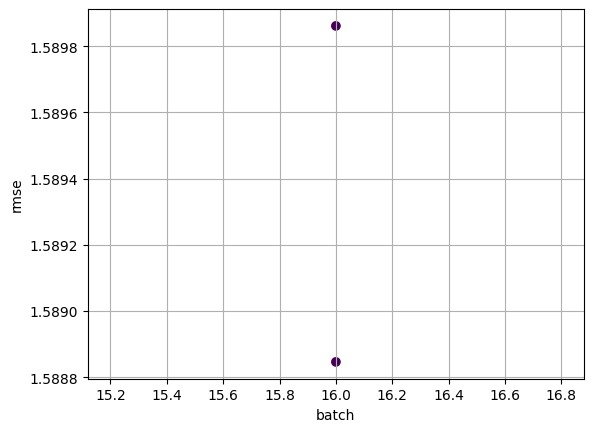

In [8]:
x='batch'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()